In [5]:
from itertools import product, combinations, permutations
import random
import math

from sklearn import datasets
import numpy as np
import pandas as pd
from scipy import stats

from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [6]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set(style="ticks")

# Intuition

In [7]:
def random_predictors(n_predictors, n_predictions):
    predictions = []
    for n in range(n_predictors):
        p = random.uniform(0.6, 0.8)
        pred = [np.random.choice([0, 1], p=[1-p, p]) for i in range(n_predictions)]
        predictions.append((p, pred))
    return predictions

In [8]:
preds = random_predictors(10, 100)
print(preds[0:2])

[(0.6068286840344967, [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1]), (0.6716027233063151, [0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])]


In [9]:
def accuracy(X, y):
    return np.dot(X, y) / y.shape[0]

In [10]:
X_pred = np.vstack([t[1] for t in preds])
print(X_pred)

[[0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0
  0 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0
  1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1]
 [0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0
  1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1
  0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1
  0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
  1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1]
 [0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1
  1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1
  1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1]
 [1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1
  0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1
  1 1 1 0 0 0 0 1 0 

In [11]:
accuracy(X_pred, np.ones(100))

array([ 0.53,  0.69,  0.74,  0.62,  0.65,  0.65,  0.77,  0.68,  0.69,  0.55])

In [12]:
def vote_ensemble(X):
    return stats.mode(X)[0]

In [13]:
ensemble_pred = vote_ensemble(X_pred)
print(ensemble_pred)

[[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0
  1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1
  1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1]]


In [14]:
accuracy(ensemble_pred, np.ones(100))

array([ 0.78])

# Iris Dataset

In [15]:
iris = datasets.load_iris()

In [16]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris.target_names[iris.target]], 
                       columns= iris['feature_names'] + ['class'])

In [17]:
iris_df.dtypes

sepal length (cm)    object
sepal width (cm)     object
petal length (cm)    object
petal width (cm)     object
class                object
dtype: object

In [18]:
for col in iris['feature_names']:
    iris_df[col] = pd.to_numeric(iris_df[col])

In [19]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
class                 object
dtype: object

In [20]:
iris_df.shape

(150, 5)

In [21]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
iris_df.groupby('class').size()

class
setosa        50
versicolor    50
virginica     50
dtype: int64

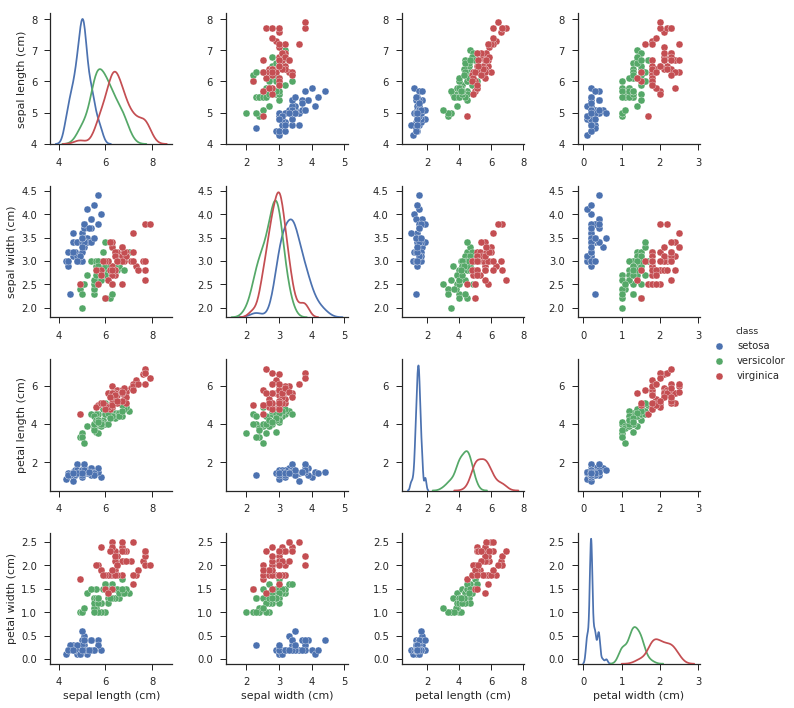

In [24]:
sns.pairplot(iris_df, hue="class", diag_kind="kde")
plt.show()

In [25]:
print(iris_df.corr())

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.109369           0.871754   
sepal width (cm)           -0.109369          1.000000          -0.420516   
petal length (cm)           0.871754         -0.420516           1.000000   
petal width (cm)            0.817954         -0.356544           0.962757   

                   petal width (cm)  
sepal length (cm)          0.817954  
sepal width (cm)          -0.356544  
petal length (cm)          0.962757  
petal width (cm)           1.000000  


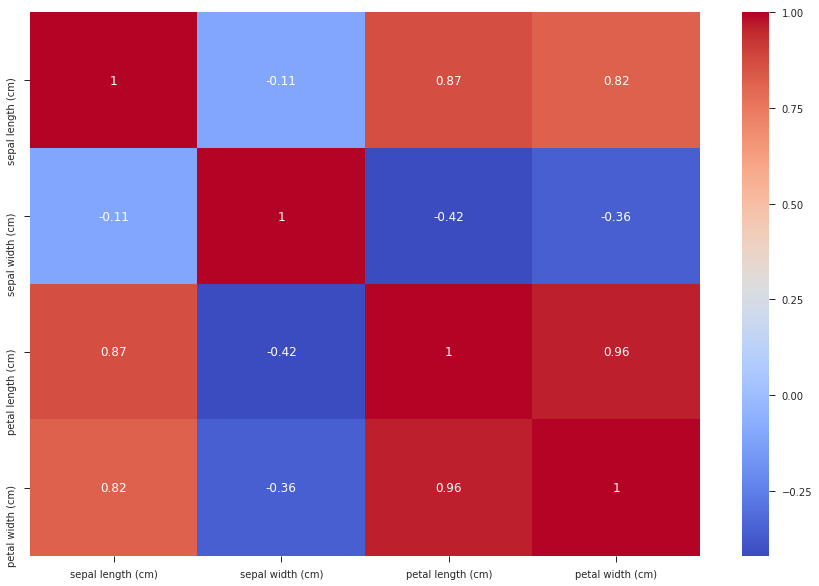

In [21]:
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Models

In [22]:
X, y = iris.data, iris.target
validation_size = 0.20
seed = 13
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [23]:
def evaluate_classifiers(models, X_train, y_train, X_validation, y_validation):
    results = []
    for name in models.keys():
        model = models[name]
        model.fit(X_train, y_train)
        predictions = model.predict(X_validation)
        acc = accuracy_score(y_validation, predictions)
        cm = confusion_matrix(y_validation, predictions)
        report = classification_report(y_validation, predictions)
        results.append((name, acc, cm, report))
    return results

In [3]:
def report_classifiers_results(model_results, metrics=['acc', 'cm', 'report']):
    for result in model_results:
        name, acc, cm, report = result
        print("Model: %s" % name)
        if metrics.contains('acc'): print("Accuracy: %f" % acc) 
        if metrics.contains('cm'): print("Confusion Matrix: \n %s" % cm)
        if metrics.contains('report'): print(report)
        print()

In [25]:
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier(random_state=13)
models['NB'] = GaussianNB()
models['SVM'] = SVC()

In [26]:
classifiers_results = evaluate_classifiers(models, X_train, y_train, X_validation, y_validation)

In [27]:
report_classifiers_results(classifiers_results)

Model: LR
Accuracy: 0.966667
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  7  1]
 [ 0  0 13]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       1.00      0.88      0.93         8
          2       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30


Model: LDA
Accuracy: 0.966667
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  1 12]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.89      1.00      0.94         8
          2       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30


Model: KNN
Accuracy: 0.900000
Confusion Matrix: 
 [[ 9  0  0]
 [ 0  8  0]
 [ 0  3 10]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         9
          1       0.73      1.00      0.84         8
          2       1.00      0.77      0.87

In [28]:
prod = product(range(3),repeat=2)
for p in prod:
    print(p)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
(2, 0)
(2, 1)
(2, 2)


In [29]:
def plot_decision_boundaries(models, X, y, cols=3):
    
    fig = plt.figure(figsize=(15, 10))
    rows = math.ceil(len(models) / (cols * 1.0))
    gs = gridspec.GridSpec(rows, cols)
    grid = []
    for r in range(rows):
        for c in range(cols):
            grid.append((r,c))

    clf_list = models.values()
    labels = models.keys()
    
    for clf, label, grd in zip(clf_list, labels, grid):
        scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
        print("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        clf.fit(X, y)
        ax = plt.subplot(gs[grd[0], grd[1]])
        fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
        plt.title(label)

    plt.show()

Accuracy: 0.74 (+/- 0.10) [LR]
Accuracy: 0.79 (+/- 0.07) [LDA]
Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.78 (+/- 0.05) [NB]
Accuracy: 0.81 (+/- 0.05) [SVM]


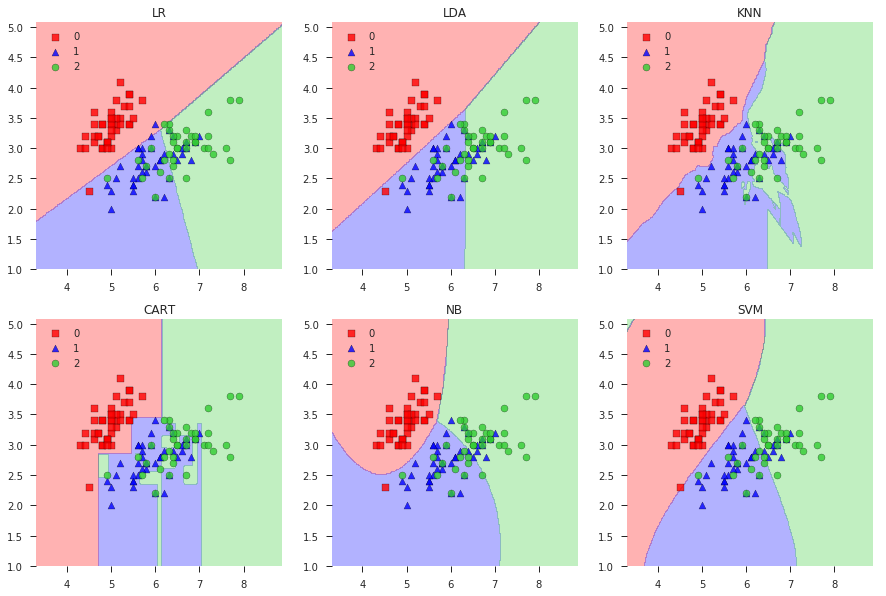

In [30]:
plot_decision_boundaries(models, X_train[:,[0,1]], y_train)

## Bagging

In [31]:
bagging_models = {name: models[name] for name in ['KNN', 'CART']}

In [32]:
bagging_models['KNN_BAGGING'] = BaggingClassifier(base_estimator=models['KNN'], n_estimators=10)
bagging_models['CART_BAGGING'] = BaggingClassifier(base_estimator=models['CART'], n_estimators=10)                                                  

Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.77 (+/- 0.03) [KNN_BAGGING]
Accuracy: 0.72 (+/- 0.06) [CART_BAGGING]


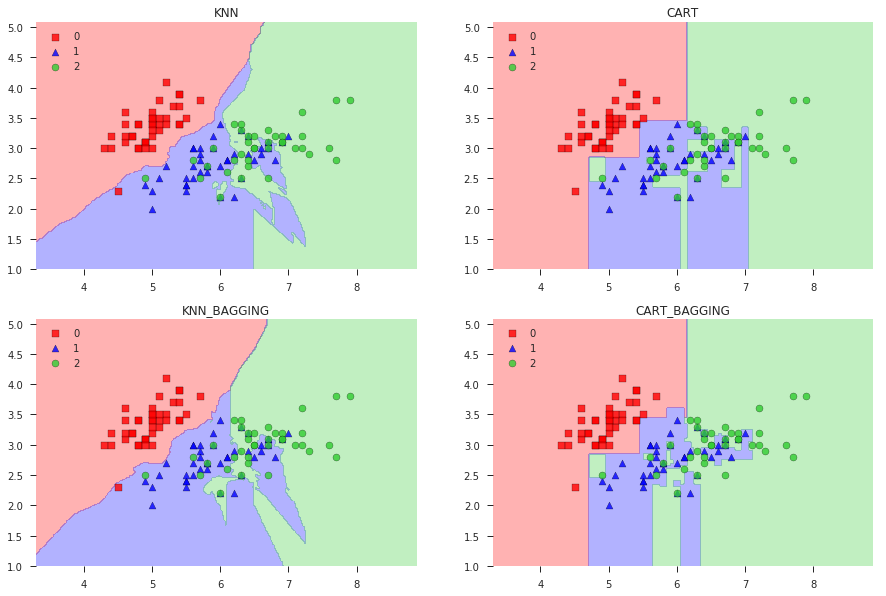

In [33]:
plot_decision_boundaries(bagging_models, X_train[:,[0,1]], y_train, cols=2)

### Random Forest

In [34]:
bagging_models['RF'] = RandomForestClassifier(random_state=0)

Accuracy: 0.79 (+/- 0.01) [KNN]
Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.76 (+/- 0.03) [KNN_BAGGING]
Accuracy: 0.70 (+/- 0.03) [CART_BAGGING]
Accuracy: 0.71 (+/- 0.06) [RF]


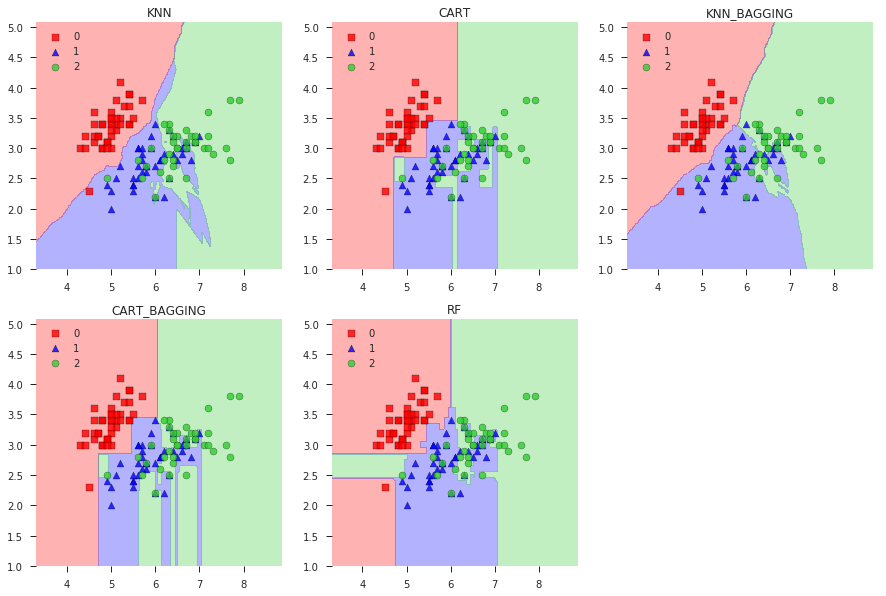

In [35]:
plot_decision_boundaries(bagging_models, X_train[:,[0,1]], y_train, cols=3)

## Boosting

In [36]:
boosting_models = {}
boosting_models['CART'] = models['CART']
boosting_models['ADABOOST_1'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=1)
boosting_models['ADABOOST_2'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=2)
boosting_models['ADABOOST_3'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=3)
boosting_models['ADABOOST_10'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=10)
boosting_models['ADABOOST_50'] = AdaBoostClassifier(base_estimator=models['CART'], n_estimators=50)

Accuracy: 0.67 (+/- 0.02) [CART]
Accuracy: 0.64 (+/- 0.03) [ADABOOST_1]
Accuracy: 0.69 (+/- 0.04) [ADABOOST_2]
Accuracy: 0.68 (+/- 0.01) [ADABOOST_3]
Accuracy: 0.71 (+/- 0.05) [ADABOOST_10]
Accuracy: 0.71 (+/- 0.05) [ADABOOST_50]


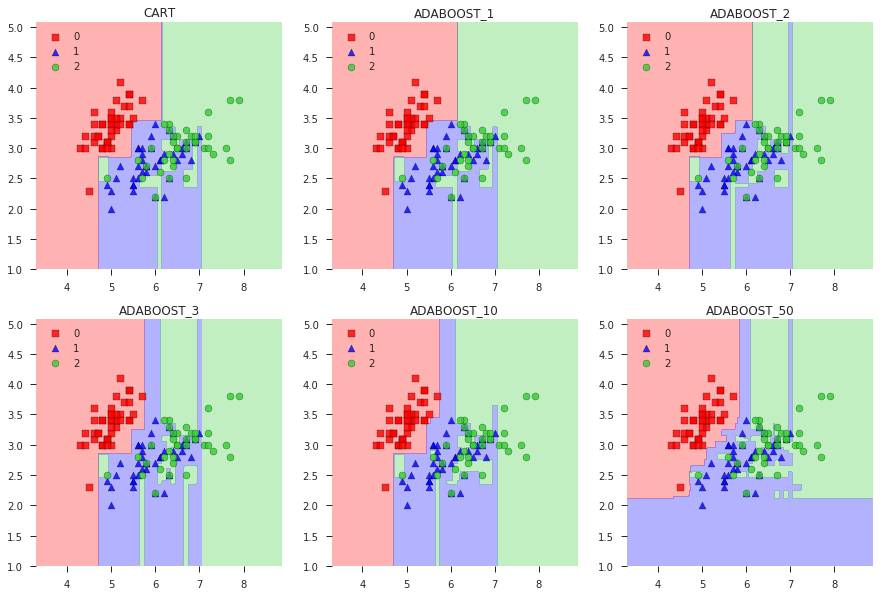

In [37]:
plot_decision_boundaries(boosting_models, X_train[:,[0,1]], y_train, cols=3)